<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [17]:
!bzip2 -d icon-eu-eps_europe_icosahedral_single-level_2019050206_048_tot_prec.grib2.bz2

In [21]:
!cdo gennn,target_grid_world_025.txt icon_grid_0024_R02B06_G.nc weights_eps.nc 
!cdo -f nc remap,target_grid_world_025.txt,weights_eps.nc icon-eps_global_icosahedral_single-level_2019050206_060_tot_prec.grib2 icon-eps_global_icosahedral_single-level_2019050206_060_tot_prec.nc

cdo: error while loading shared libraries: libhdf5_hl.so.8: cannot open shared object file: No such file or directory


In [45]:
import xarray as xr
import glob
import numpy as np
%matplotlib inline

In [28]:
glob.glob('icon-eps_global_icosahedral_single-level_2019050206_0*_tot_prec.nc')

['icon-eps_global_icosahedral_single-level_2019050206_060_tot_prec.nc',
 'icon-eps_global_icosahedral_single-level_2019050206_042_tot_prec.nc',
 'icon-eps_global_icosahedral_single-level_2019050206_054_tot_prec.nc',
 'icon-eps_global_icosahedral_single-level_2019050206_048_tot_prec.nc']

In [52]:
ds = xr.open_dataset('icon-eps_global_icosahedral_single-level_2019050206_048_tot_prec.nc')
ds

<xarray.Dataset>
Dimensions:  (lat: 721, lon: 1440, time: 40)
Coordinates:
  * time     (time) datetime64[ns] 2019-05-04T06:00:00 ... 2019-05-04T06:00:00
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.25 359.5 359.75
  * lat      (lat) float32 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
Data variables:
    tp       (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions:  CF-1.6
    history:      Thu May 02 18:40:25 2019: cdo -f nc remap,target_grid_world...
    institution:  Deutscher Wetterdienst
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...

In [53]:
ds.time

<xarray.DataArray 'time' (time: 40)>
array(['2019-05-04T06:00:00.000000000', '2019-05-04T06:00:00.000000000',
       '2019-05-04T06:00:00.000000000', '2019-05-04T06:00:00.000000000',
       '2019-05-04T06:00:00.000000000', '2019-05-04T06:00:00.000000000',
       '2019-05-04T06:00:00.000000000', '2019-05-04T06:00:00.000000000',
       '2019-05-04T06:00:00.000000000', '2019-05-04T06:00:00.000000000',
       '2019-05-04T06:00:00.000000000', '2019-05-04T06:00:00.000000000',
       '2019-05-04T06:00:00.000000000', '2019-05-04T06:00:00.000000000',
       '2019-05-04T06:00:00.000000000', '2019-05-04T06:00:00.000000000',
       '2019-05-04T06:00:00.000000000', '2019-05-04T06:00:00.000000000',
       '2019-05-04T06:00:00.000000000', '2019-05-04T06:00:00.000000000',
       '2019-05-04T06:00:00.000000000', '2019-05-04T06:00:00.000000000',
       '2019-05-04T06:00:00.000000000', '2019-05-04T06:00:00.000000000',
       '2019-05-04T06:00:00.000000000', '2019-05-04T06:00:00.000000000',
       '2019-0

In [54]:
ds.time[0]

<xarray.DataArray 'time' ()>
array('2019-05-04T06:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2019-05-04T06:00:00
Attributes:
    standard_name:  time
    axis:           T

In [38]:
ds.rename({'time':'ens'})

<xarray.Dataset>
Dimensions:  (ens: 40, lat: 721, lon: 1440)
Coordinates:
  * ens      (ens) datetime64[ns] 2019-05-04T06:00:00 ... 2019-05-04T06:00:00
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.25 359.5 359.75
  * lat      (lat) float32 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
Data variables:
    tp       (ens, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions:  CF-1.6
    history:      Thu May 02 18:40:25 2019: cdo -f nc remap,target_grid_world...
    institution:  Deutscher Wetterdienst
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...

In [55]:
def rename(ds):
    t_arr = ds['time'][0]
    ds = ds.rename({'time':'ens'})
    ds['ens'] = np.arange(40)
    ds['time'] = t_arr
    return ds

In [56]:
ds = xr.open_mfdataset('icon-eps_global_icosahedral_single-level_2019050206_0*_tot_prec.nc', \
                       concat_dim='time', preprocess = rename)
ds

<xarray.Dataset>
Dimensions:  (ens: 40, lat: 721, lon: 1440, time: 4)
Coordinates:
  * ens      (ens) int64 0 1 2 3 4 5 6 7 8 9 ... 30 31 32 33 34 35 36 37 38 39
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.25 359.5 359.75
  * lat      (lat) float32 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
  * time     (time) datetime64[ns] 2019-05-04 ... 2019-05-04T18:00:00
Data variables:
    tp       (time, ens, lat, lon) float32 dask.array<shape=(4, 40, 721, 1440), chunksize=(1, 40, 721, 1440)>
Attributes:
    CDI:          Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions:  CF-1.6
    history:      Thu May 02 18:40:12 2019: cdo -f nc remap,target_grid_world...
    institution:  Deutscher Wetterdienst
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...

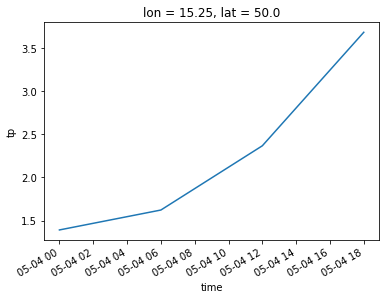

In [88]:
ds['tp'].sel(lat = lat0, lon = lon0, method ='nearest').mean('ens').plot()

In [89]:
lat0, lon0 = 49.95, 15.266667
delta = 0.5
temp = ds.sel(lat = slice(lat0-delta,lat0+delta), lon = slice(lon0-delta,lon0+delta))['tp'].stack(points = ('lat','lon'))
temp#.plot(x = 'time', vmin = 0)

<xarray.DataArray 'tp' (time: 4, ens: 40, points: 16)>
dask.array<shape=(4, 40, 16), dtype=float32, chunksize=(1, 40, 16)>
Coordinates:
  * ens      (ens) int64 0 1 2 3 4 5 6 7 8 9 ... 30 31 32 33 34 35 36 37 38 39
  * time     (time) datetime64[ns] 2019-05-04 ... 2019-05-04T18:00:00
  * points   (points) MultiIndex
  - lat      (points) float64 49.5 49.5 49.5 49.5 ... 50.25 50.25 50.25 50.25
  - lon      (points) float64 15.0 15.25 15.5 15.75 ... 15.0 15.25 15.5 15.75
Attributes:
    long_name:           Total Precipitation
    units:               kg m**-2
    param:               52.1.0
    realization:         1
    ensemble_members:    40
    forecast_init_type:  192

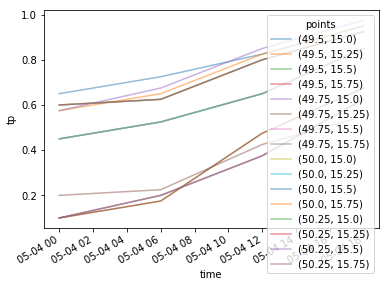

In [91]:
((temp > 1).sum('ens')/40.).plot.line(hue = 'points', alpha = 0.5)